### Pokemon Combat Analysis
#### 1. Pokemon Analysis (Directly do clustering, see how will the program group the data)
- 1-1. Simple Analysis (pokemon.csv)
    - Type vs Generation
        - Types of pokemon in each generation
        - The base stat of each type

#### 2. Predict the winner 
- 2-1. Analysis on total stats of each pokemon
- 2-2. Why does a superior pokemon lose a inferior pokemon happen? 
    - First Attack
    - Type Advantages 
        - Primary
        - Secondary 
- 2-3. What pokemon have most high percentage of winning?    
- 2-4. Predict the winner

---------------------------------------

#### 1. Pokemon Analysis
##### 1-1. Simple Analysis

In [2]:
%matplotlib inline
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
pokemon = pd.read_csv("/Users/gillianchiang/Desktop/Course/year4_sem2/FYP2/Data/pokemon-challenge/pokemon.csv")

Types of Pokemon

In [4]:
ptype = pokemon.groupby(['Type 1'])
print("single type: "+ str(len(ptype)))
pokemon['type'] = np.where(pokemon['Type 2'].isnull() == False, pokemon['Type 1']+","+pokemon['Type 2'], pokemon['Type 1']) 
newtype = pokemon.groupby(['type']).mean()
print("two types: "+ str(len(newtype)))

single type: 18
two types: 154


In [5]:
from numpy import arange
poke_type_count = pokemon.pivot_table(values='Name', index=['Type 1'],columns=['Type 2'], aggfunc='count', fill_value=0)
cm = sns.light_palette("#2ecc71", as_cmap=True)
poke_type_count.style.background_gradient(cmap=cm)

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


####  2. Predict the Winner
##### 2-1. Analysis on total stats of each pokemon 
In Pokemon Game, pokemon's base stat is an important defining characteristic. Apparently, pokemons with high base stat total are strong and popular on battle.

In [6]:
combats = pd.read_csv("/Users/gillianchiang/Desktop/Course/year4_sem2/FYP2/Data/pokemon-challenge/combats.csv")

In [7]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head(5)

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


Count the pokemon base stats total distribution

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64


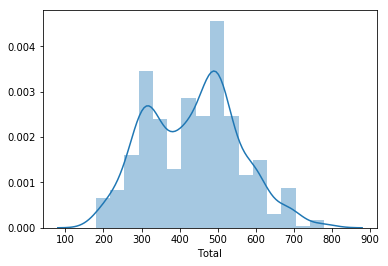

In [8]:
#Count the base stats 
pokemon["Total"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
print(pokemon["Total"].describe())
sns.distplot(pokemon["Total"])
plt.show()

This diagram shows that the distribution of pokemon's base stat total is a bimodal distribution.
- First mode: around 300 
- Second mode: around 500  


Check the difference distribution of total base stats between one pokemon and the other pokemon in each match.
<br> Find: the probability that higher base stat total pokemon win

In [9]:
stat_dict = dict(zip(pokemon['#'], pokemon['Total']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_stat = combats[cols].replace(stat_dict)

#count stat difference
combats_stat['stat_diff'] = combats_stat['First_pokemon'] - combats_stat['Second_pokemon']
combats_stat.head(10)

,First_pokemon,Second_pokemon,Winner,stat_diff
0,300,340,340,-40
1,580,580,580,0
2,405,485,485,-80
3,250,485,485,-235
4,495,505,495,-10
5,319,520,319,-201
6,320,455,455,-135
7,305,680,680,-375
8,290,330,330,-40
9,270,320,320,-50


possible situation:
1. stat_diff > 0, 1st win (normal)
2. stat_diff > 0, 2nd win
3. stat_diff < 0, 1st win
4. stat_diff < 0, 2nd win (normal)
- stat_diff = 0, 1st or 2nd win 
    - winning reason
        - first Attack? 
        - type Advantage?

In [10]:
#situation 1, 4: True, situation 2, 3: False
combats_stat['isHighStat'] = ""
for i in range(10):
    stat_diff = combats_stat['stat_diff'].values[i]
    fpoke = combats_stat['First_pokemon'].values[i]
    spoke = combats_stat['Second_pokemon'].values[i]
    wpoke = combats_stat['Winner'].values[i]

    if ((stat_diff > 0) & (fpoke == wpoke)) | ((stat_diff < 0) & (spoke == wpoke)):
        combats_stat['isHighStat'].values[i] = True
    else:
        combats_stat['isHighStat'].values[i]  = False

combats_stat.head(10)

,First_pokemon,Second_pokemon,Winner,stat_diff,isHighStat
0,300,340,340,-40,True
1,580,580,580,0,False
2,405,485,485,-80,True
3,250,485,485,-235,True
4,495,505,495,-10,False
5,319,520,319,-201,False
6,320,455,455,-135,True
7,305,680,680,-375,True
8,290,330,330,-40,True
9,270,320,320,-50,True


count    50000.000000
mean       136.551440
std        101.221212
min          0.000000
25%         54.000000
50%        118.000000
75%        200.000000
max        590.000000
Name: stat_diff, dtype: float64


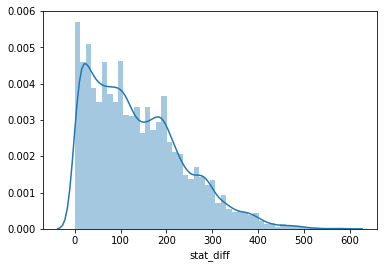

In [11]:
#show the stat difference
diff = combats_stat["stat_diff"].abs()
print(diff.describe())
sns.distplot(diff)
plt.show()

- The medium of stat difference is 118.00
- Higher total base stat win lower total base stat?      
    - Count all: the percentage of higher pokemon winning
    - Only difference above 100: the percentage of higher pokemon winning

##### 2-2. Why does a superior pokemon lose a inferior pokemon happen? 
1. First Attack
2. Type Advantages 
    - Primary
    - Secondary 